In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = {}

all_count_list = []

for i in range(2010, 2022):
    df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
    all_count_list.append(len(df[i]))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4524\1830327641.py:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4524\1830327641.py:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4524\1830327641.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4524\1830327641.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")


In [76]:
# hypogamy -> 강혼

def getDataFrame(womanMarriageCode):
    context = []

    for i in range(2010, 2022):
        woman_marriaged = df[i][df[i]['아내결혼코드'] == womanMarriageCode]

        woman_marriaged = woman_marriaged.drop(labels = woman_marriaged[woman_marriaged['아내교육코드'].isin([1])].index)

        hypogamy_condition = woman_marriaged['아내교육코드'] > woman_marriaged['남편교육코드']

        woman_edu_revised = woman_marriaged[hypogamy_condition]

        context.append(woman_edu_revised)

    return context

In [77]:
def getAllCountList(womanMarriageCode):
    l = []

    for i in range(2010, 2022):
        woman_marriaged = df[i][df[i]['아내결혼코드'] == womanMarriageCode]

        woman_marriaged = woman_marriaged.drop(labels = woman_marriaged[woman_marriaged['아내교육코드'].isin([1])].index)

        l.append(len(woman_marriaged))

    return l



In [78]:
df[2019][df[2019]['아내교육코드'] > df[2019]['남편교육코드']]['아내교육코드'].value_counts()

5    25154
6    10613
4     2450
Name: 아내교육코드, dtype: int64

### 강혼 여성 인원 추세

<BarContainer object of 12 artists>

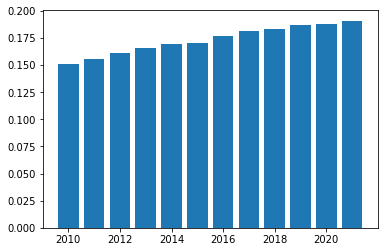

In [79]:
# 시대가 변하면서 강혼에 대한 편견이 많이 사라지지 않았을까?
hypogamy_list_first = getDataFrame(1) 
hypogamy_list_second = getDataFrame(2) 

hypogamy_length_first = [len(x) for x in hypogamy_list_first]

# X축 연도, Y축 해당 연도 강혼 인원 비율 -> plot

list_ratio = []

for i in range(0, 12):
    list_ratio.append(hypogamy_length_first[i] / getAllCountList(1)[i])

plt.bar(x=range(2010, 2022), height = list_ratio)

# 초혼 여성의 경우 뚜렷한 비율 상승세가 나타남

<BarContainer object of 12 artists>

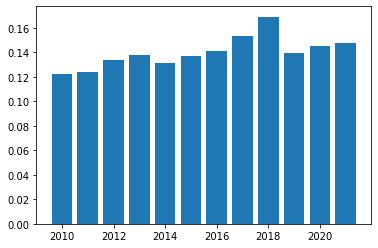

In [80]:
hypogamy_length_second = [len(x) for x in hypogamy_list_second]

list_ratio = []

for i in range(0, 12):
    list_ratio.append(hypogamy_length_second[i] / getAllCountList(2)[i])

plt.bar(x=range(2010, 2022), height = list_ratio)

# 재혼 여성에서는 두드러진 패턴이 나타나지 않음

### 초혼 강혼 여성 나이 추세

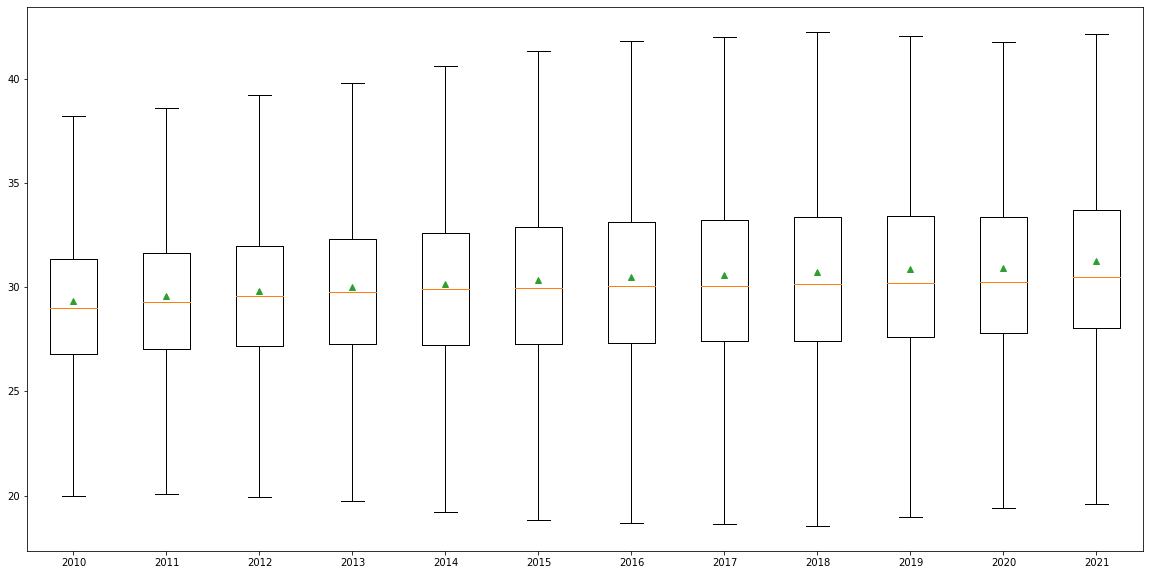

In [81]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot([x['아내연령'] for x in getDataFrame(1)], showfliers=False, showmeans=True)
ax.set_xticklabels(range(2010, 2022))

plt.show()

### 초혼 강혼 여성 학력 

<AxesSubplot:>

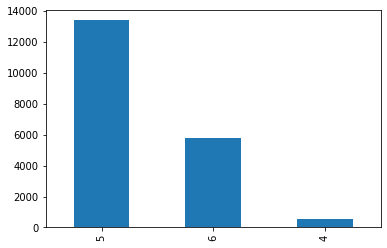

In [82]:
getDataFrame(1)[11]['아내교육코드'].value_counts().plot.bar()

# 여자 초졸 - 남자 무학 / 여자 중졸 - 남자 초졸 이하 케이스 없음
# 즉 현 데이터에서 강혼 여성은 고졸 이상
# 여성이 대학교졸인 케이스가 압도적으로 많음

### 초혼 강혼 여성 나이 차 추세

In [83]:
hypogamy_first = getDataFrame(1)

for i in range(0, 12):
    hypogamy_first[i]['나이 차'] = hypogamy_first[i]['남편연령'] - hypogamy_first[i]['아내연령']

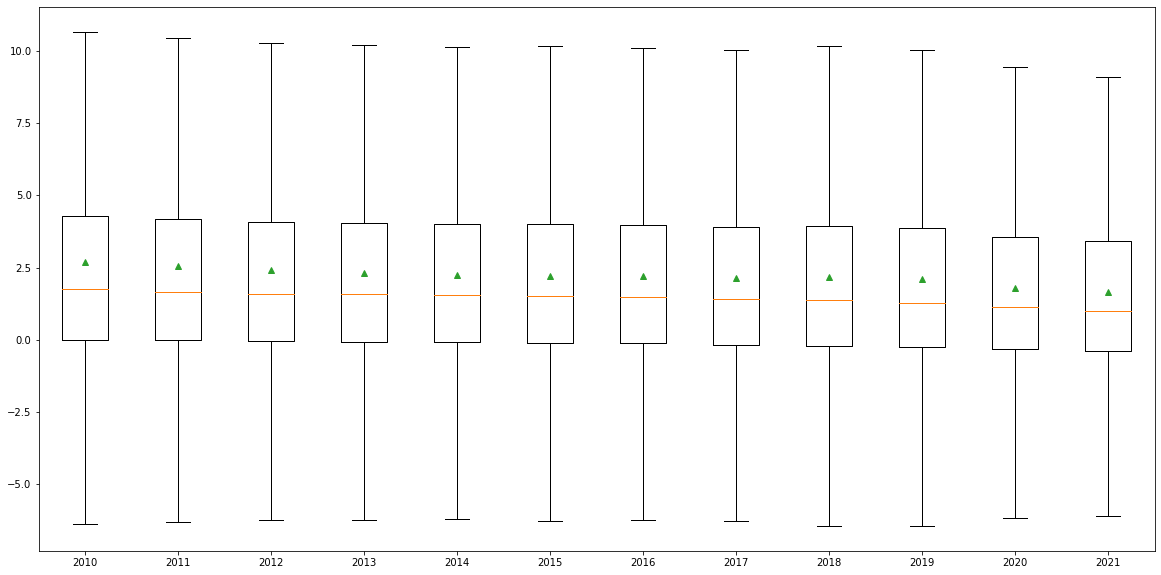

In [84]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot([x['나이 차'] for x in hypogamy_first], showfliers=False, showmeans=True)
ax.set_xticklabels(range(2010, 2022))

plt.show()

# 초혼 강혼 여성과 남편의 나이 차 점점 줄어들고 있음

In [85]:
import scipy
scipy.stats.ttest_ind(hypogamy_first[3]['나이 차'], hypogamy_first[2]['나이 차'], alternative="greater")

Ttest_indResult(statistic=-3.021883938344976, pvalue=0.9987435965154602)

### 

### 초혼 강혼 여성 직업 분포

<AxesSubplot:>

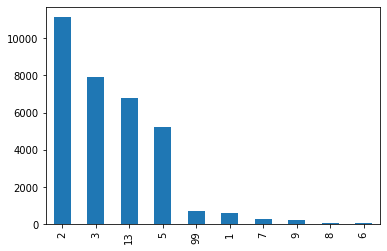

In [98]:
# 대졸/대학원졸 출신 높음 -> 전문가 비율 높을 것

getDataFrame(1)[9]['아내직업코드'].value_counts().plot.bar()

# 2017년까지는 무직/주부 제일 높으나 전문가 수가 꾸준히 추격, 2018년부터는 전문가 수가 1위 유지 

### 배우자가 젊을수록 동질혼의 가능성은 높아질 수 있다. > 20대의 동질혼 비율과 30대의 동질혼 비율 40대의 동질혼 비율 비교..?

0.675535015997156
0.6726628386865243


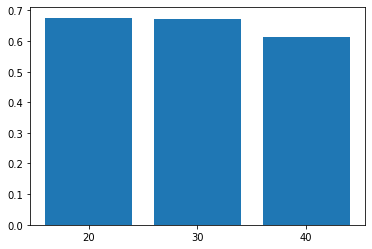

In [104]:
# 20대 30대 40대 50대 -> 나이대 별로 학력 수준이 같은 정도 비율 비교

year = 2020
# 1. 아내 초혼 기준
first_marriage = df[year]['아내결혼코드'] == 1
gen_20 = df[year][(df[year]['아내연령'].between(20, 30)) & first_marriage]
gen_30 = df[year][(df[year]['아내연령'].between(30, 40)) & first_marriage]
gen_40 = df[year][(df[year]['아내연령'].between(40, 50)) & first_marriage]
gen_50 = df[year][(df[year]['아내연령'].between(50, 60)) & first_marriage]


# 교육수준 같은 20대 / 전체 20대

gen_20_same_ratio = len(gen_20[gen_20['아내교육코드'] == gen_20['남편교육코드']]) / len(gen_20)
gen_30_same_ratio = len(gen_30[gen_30['아내교육코드'] == gen_30['남편교육코드']]) / len(gen_30)
gen_40_same_ratio = len(gen_40[gen_40['아내교육코드'] == gen_40['남편교육코드']]) / len(gen_40)

plt.bar(x=['20', '30', '40'], height=[gen_20_same_ratio, gen_30_same_ratio, gen_40_same_ratio])

print(gen_20_same_ratio)
print(gen_30_same_ratio)

# 각 세대 중 동질 혼 건수 / 각 세대 전체 건수
# -> 20대 > 30대 > 40대 ; 20대와 30대는 비율이 0.003정도 차이남

### 지역 별 강혼 비율

In [112]:
# 각 지역 강혼 수 / 각 지역 전체 혼인 수

year = 2020

hypogamy_per_area = dict(getDataFrame(1)[year - 2010]['아내지역코드'].value_counts())



marriage_per_area = dict(df[year]['아내지역코드'].value_counts())


ratio_area = {}

for k in list(ratio_area.keys()):
     if ratio_area[k] > 39:
         del ratio_area[k]

for job_code in hypogamy_per_area:
    ratio_area[job_code] = hypogamy_per_area[job_code] / marriage_per_area[job_code]



In [110]:
df[2020][df[2020]['아내지역코드'] == 89]

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,아내교육코드,남편결혼코드,아내결혼코드,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드
5679,2020,12,4,31,89,2020,12,8,9,5,5,1,1,28.408,24.775,1.0,NaN,3.0,***
43897,2021,5,17,11,89,2020,11,1,3,4,5,3,1,49.819,35.797,NaN,NaN,NaN,NaN
55012,2021,9,16,31,89,2020,4,3,13,5,6,1,1,28.898,26.298,NaN,NaN,NaN,NaN
56682,2021,6,23,21,89,2020,3,13,5,5,4,3,1,60.216,40.326,NaN,NaN,NaN,NaN
58595,2021,7,20,31,89,2020,12,3,13,5,5,1,1,33.558,24.649,NaN,NaN,NaN,NaN
76630,2020,1,30,38,89,2020,1,2,2,5,6,1,1,31.572,29.353,1.0,NaN,3.0,***
96904,2020,6,19,38,89,2020,6,5,7,5,4,1,1,32.315,21.216,1.0,NaN,3.0,***
109723,2020,4,22,11,89,2020,4,2,13,5,4,1,1,31.419,22.523,1.0,NaN,3.0,***
146549,2020,8,5,31,89,2020,7,3,3,5,6,1,1,38.726,35.435,1.0,NaN,3.0,***
156479,2020,7,17,31,89,2020,6,5,5,5,5,1,1,25.956,20.306,1.0,NaN,3.0,***
